## Essential Libraries

In [1]:
import re
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder, MultiLabelBinarizer, RobustScaler,FunctionTransformer

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Importing DataSets

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
print(train.shape)
print(train.info())

(100000, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 

In [5]:
train.head(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.82262,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.94496,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good


In [6]:
print(test.shape)
print(test.info())

(50000, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 

In [7]:
test.head(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196


In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


### Identifying Null Values

Train

In [9]:
train.isna().sum().sort_values(ascending=False).head(10)

Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Name                        9985
Credit_History_Age          9030
Num_of_Delayed_Payment      7002
Amount_invested_monthly     4479
Num_Credit_Inquiries        1965
Monthly_Balance             1200
Month                          0
Age                            0
dtype: int64

Test

In [10]:
test.isna().sum().sort_values(ascending=False).head(10)

Monthly_Inhand_Salary      7498
Type_of_Loan               5704
Name                       5015
Credit_History_Age         4470
Num_of_Delayed_Payment     3498
Amount_invested_monthly    2271
Num_Credit_Inquiries       1035
Monthly_Balance             562
Customer_ID                   0
Month                         0
dtype: int64

### Removing Null values and Unneccessary Columns

Train

In [11]:
# This column has no usage in Credit prediction
train = train.drop('Name',axis=1)
train = train.drop('ID',axis=1)
train = train.drop('SSN',axis=1)
train = train.drop('Age',axis=1)
train = train.drop('Month',axis=1)
train = train.drop('Occupation',axis=1)
train = train.drop('Amount_invested_monthly',axis=1)

# Fill with Median Values
cols = ['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment',
        'Num_Credit_Inquiries', 'Monthly_Balance']

# Convert to numeric (force errors to become NaN)
train[cols] = train[cols].apply(pd.to_numeric, errors='coerce')

train['Monthly_Inhand_Salary'] = train['Monthly_Inhand_Salary'].fillna(train['Monthly_Inhand_Salary'].median())
train['Num_of_Delayed_Payment'] = train['Num_of_Delayed_Payment'].fillna(train['Num_of_Delayed_Payment'].median())
train['Num_Credit_Inquiries'] = train['Num_Credit_Inquiries'].fillna(train['Num_Credit_Inquiries'].median())
train['Monthly_Balance'] = train['Monthly_Balance'].fillna(train['Monthly_Balance'].median())

# Replace value with Unknown value to Preserves category info
train['Type_of_Loan'] = train['Type_of_Loan'].fillna('Unknown')

# Use Regex Code to convert values
train['Credit_History_Age'] = train['Credit_History_Age'].str.extract(r'(\d+)').astype(float)
train['Credit_History_Age'].fillna(train['Credit_History_Age'].median(), inplace=True)
train['Credit_Mix'] = train['Credit_Mix'].str.match(r'^(Standard|Good|Bad)$', na=False)

Test

In [12]:
# This column has no usage in Credit prediction
test = test.drop('Name', axis=1)
test = test.drop('ID', axis=1)
test = test.drop('SSN', axis=1)
test = test.drop('Age', axis=1)
test = test.drop('Month', axis=1)
test = test.drop('Occupation', axis=1)
test = test.drop('Amount_invested_monthly', axis=1)

# Fill with Median Values
cols = ['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment',
        'Num_Credit_Inquiries', 'Monthly_Balance']

# Convert to numeric (force errors to become NaN)
test[cols] = test[cols].apply(pd.to_numeric, errors='coerce')

test['Monthly_Inhand_Salary'] = test['Monthly_Inhand_Salary'].fillna(test['Monthly_Inhand_Salary'].median())
test['Num_of_Delayed_Payment'] = test['Num_of_Delayed_Payment'].fillna(test['Num_of_Delayed_Payment'].median())
test['Num_Credit_Inquiries'] = test['Num_Credit_Inquiries'].fillna(test['Num_Credit_Inquiries'].median())
test['Monthly_Balance'] = test['Monthly_Balance'].fillna(test['Monthly_Balance'].median())

# Replace value with Unknown value to preserve category info
test['Type_of_Loan'] = test['Type_of_Loan'].fillna('Unknown')

# Use Regex Code to convert values
test['Credit_History_Age'] = test['Credit_History_Age'].str.extract(r'(\d+)').astype(float)
test['Credit_History_Age'].fillna(test['Credit_History_Age'].median(), inplace=True)

test['Credit_Mix'] = test['Credit_Mix'].str.match(r'^(Standard|Good|Bad)$', na=False)


### Rechecking Nulls

Train

In [13]:
train.isna().sum().sort_values(ascending=False).head(10)

Customer_ID               0
Annual_Income             0
Monthly_Inhand_Salary     0
Num_Bank_Accounts         0
Num_Credit_Card           0
Interest_Rate             0
Num_of_Loan               0
Type_of_Loan              0
Delay_from_due_date       0
Num_of_Delayed_Payment    0
dtype: int64

In [14]:
train.shape

(100000, 21)

Test

In [15]:
test.isna().sum().sort_values(ascending=False).head(10)

Customer_ID               0
Annual_Income             0
Monthly_Inhand_Salary     0
Num_Bank_Accounts         0
Num_Credit_Card           0
Interest_Rate             0
Num_of_Loan               0
Type_of_Loan              0
Delay_from_due_date       0
Num_of_Delayed_Payment    0
dtype: int64

In [16]:
test.shape

(50000, 20)

## EDA(Exploratory Data Analysis)

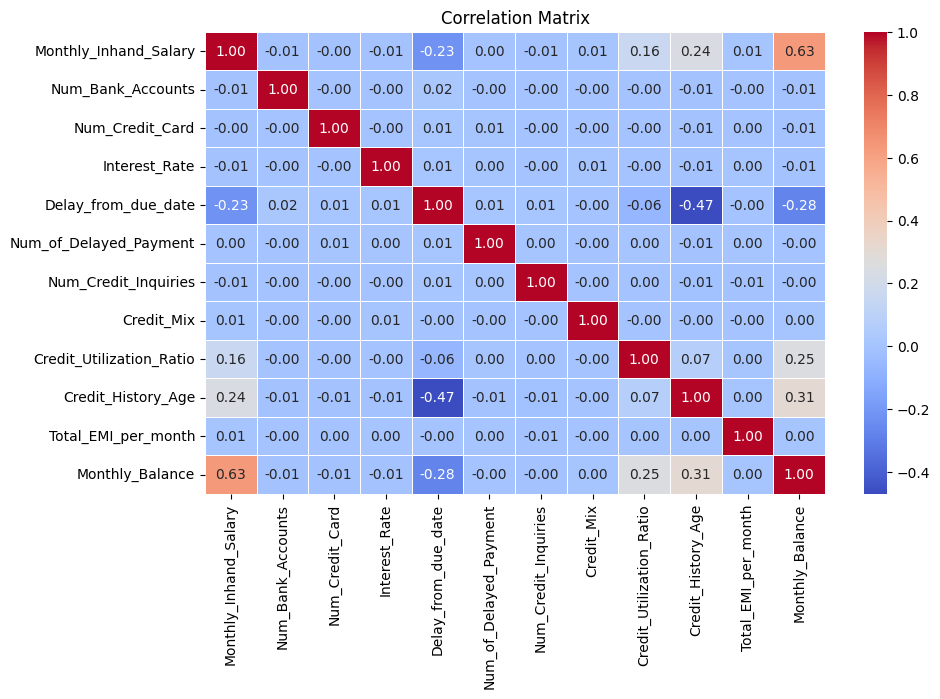

In [17]:
corr = train.corr(numeric_only=True)

plt.figure(figsize=(10, 6))

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

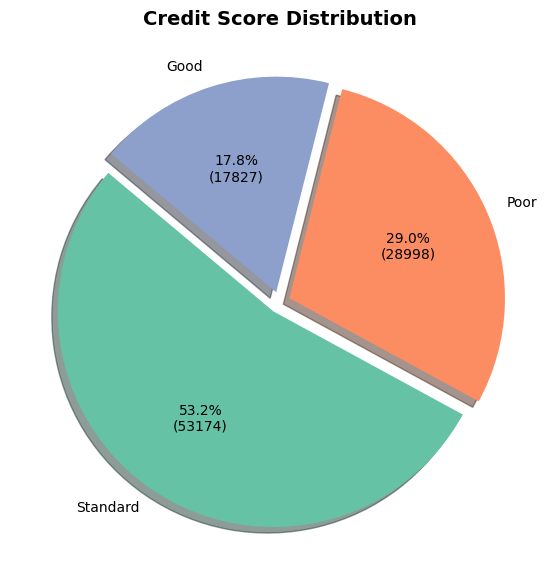

In [18]:
Credit_Score = train['Credit_Score'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(
    Credit_Score,
    labels=Credit_Score.index,
    autopct=lambda p: f'{p:.1f}%\n({int(p*sum(Credit_Score)/100)})',
    startangle=140,
    shadow=True,
    explode=[0.05]*len(Credit_Score), 
    colors=plt.cm.Set2.colors
)

plt.title("Credit Score Distribution", fontsize=14, weight='bold')
plt.show()

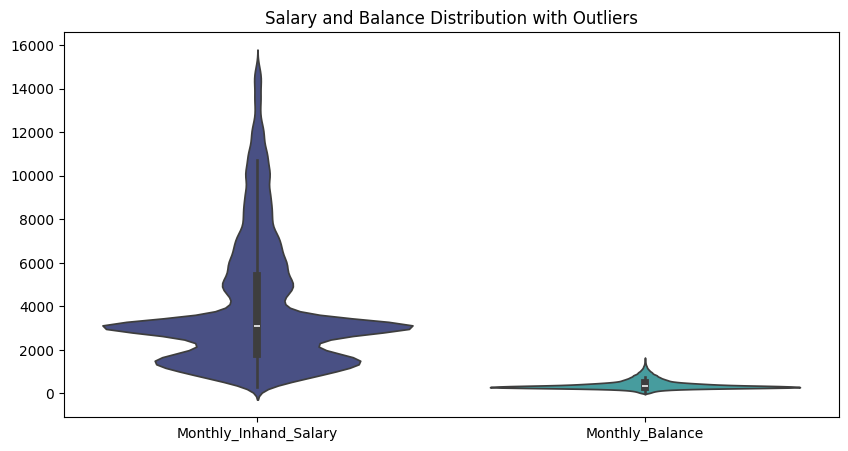

In [19]:
plt.figure(figsize=(10,5))
sns.violinplot(data=train[['Monthly_Inhand_Salary','Monthly_Balance']],palette='mako')
plt.title("Salary and Balance Distribution with Outliers")
plt.show()

We have data of eight month for each customer. This will make model cheat. So, I am applying aggration here, Group by Customer ID.

Text(0.5, 1.0, 'Ratio of Delay from Due Date ')

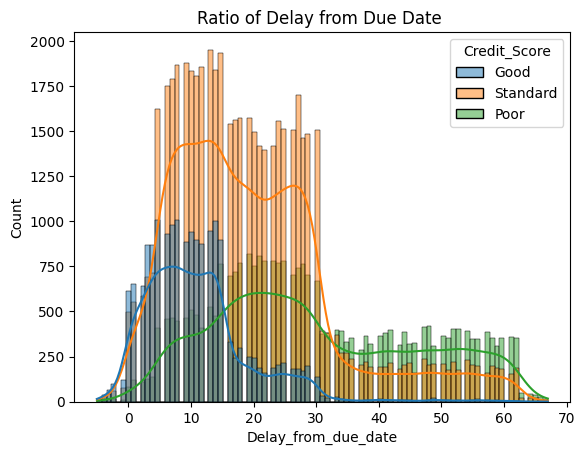

In [20]:
sns.histplot(train,x='Delay_from_due_date',kde=True,hue='Credit_Score')
plt.title("Ratio of Delay from Due Date ")

In [21]:
train.columns

Index(['Customer_ID', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')

## Aggregation

Train

In [22]:
# Group by User_ID and aggregate
num_train = train.select_dtypes(include='number').groupby(train['Customer_ID']).mean()
cat_train = train.select_dtypes(exclude='number').groupby(train['Customer_ID']).agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
)

# Combine numeric + categorical
train = pd.concat([num_train, cat_train], axis=1)

print("Aggregation complete!")
print("New shape:", train.shape)

Aggregation complete!
New shape: (12500, 21)


Test

In [23]:
# Group by User_ID and aggregate
num_test = test.select_dtypes(include='number').groupby(test['Customer_ID']).mean()
cat_test = test.select_dtypes(exclude='number').groupby(test['Customer_ID']).agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else None
)

# Combine numeric + categorical
test = pd.concat([num_test, cat_test], axis=1)

print("Aggregation complete!")
print("New shape:", test.shape)

Aggregation complete!
New shape: (12500, 20)


## Encoding

### Train

Label Encoding

In [24]:
le = LabelEncoder()

train['Credit_Mix'] = train['Credit_Mix'].astype(str).str.strip().str.replace('_', '')
train['Credit_Mix'] = le.fit_transform(train['Credit_Mix'])

train['Payment_of_Min_Amount'] = train['Payment_of_Min_Amount'].astype(str).str.strip().str.replace('_', '')
train['Payment_of_Min_Amount'] = le.fit_transform(train['Payment_of_Min_Amount'])

train['Credit_Score'] = train['Credit_Score'].astype(str).str.strip().str.replace('_', '')
train['Credit_Score'] = le.fit_transform(train['Credit_Score'])

Multi-Label Encoding

In [25]:
# Clean strings: Remove 'and', split by comma, and strip whitespace
train['Type_of_Loan'] = train['Type_of_Loan'].str.replace('and ', '', regex=False)
train['Type_of_Loan'] = train['Type_of_Loan'].apply(
    lambda x: [i.strip() for i in str(x).split(',')] if x not in ['Unknown', None] else []
)

# Apply MultiLabelBinarizer
mlb = MultiLabelBinarizer()
loan_encoded = mlb.fit_transform(train['Type_of_Loan'])

# Create new columns and merge
loan_columns = pd.DataFrame(loan_encoded, columns=mlb.classes_, index=train.index)
train = pd.concat([train, loan_columns], axis=1).drop('Type_of_Loan', axis=1)

One-Hot Encoding

In [26]:
train = pd.get_dummies(train, columns=['Payment_Behaviour'], prefix='Pay_Behav',dtype=int)
if 'Pay_Behav_!@9#%8' in train.columns:
    train.drop(columns=['Pay_Behav_!@9#%8'], inplace=True)

Robust Scaling

In [27]:
# Define numerical columns that need scaling
num_features = [
    'Monthly_Inhand_Salary', 'Annual_Income', 'Outstanding_Debt', 
    'Total_EMI_per_month', 'Monthly_Balance', 'Interest_Rate'
]
for col in num_features:
    train[col] = pd.to_numeric(train[col].astype(str).str.replace('_', ''), errors='coerce')

scaler = RobustScaler()
train[num_features] = scaler.fit_transform(train[num_features])

# Drop unique identifiers that don't help prediction
train.drop(columns=['Customer_ID'], inplace=True, errors='ignore')

In [28]:
# Convert columns to numeric, forcing errors (like strings or symbols) to NaN
train['Num_of_Loan'] = pd.to_numeric(train['Num_of_Loan'], errors='coerce')
train['Changed_Credit_Limit'] = pd.to_numeric(train['Changed_Credit_Limit'], errors='coerce')

### Test

Label Encoding

In [29]:
le = LabelEncoder()

test['Credit_Mix'] = test['Credit_Mix'].astype(str).str.strip().str.replace('_', '')
test['Credit_Mix'] = le.fit_transform(train['Credit_Mix'])

test['Payment_of_Min_Amount'] = test['Payment_of_Min_Amount'].astype(str).str.strip().str.replace('_', '')
test['Payment_of_Min_Amount'] = le.fit_transform(test['Payment_of_Min_Amount'])

Multi-Label Encoding

In [30]:
# Clean strings in the test set
test['Type_of_Loan'] = test['Type_of_Loan'].str.replace('and ', '', regex=False)
test['Type_of_Loan'] = test['Type_of_Loan'].apply(
    lambda x: [i.strip() for i in str(x).split(',')] if x not in ['Unknown', None] else []
)

loan_encoded_test = mlb.transform(test['Type_of_Loan'])

# Create new columns and merge
loan_columns_test = pd.DataFrame(loan_encoded_test, columns=mlb.classes_, index=test.index)
test = pd.concat([test, loan_columns_test], axis=1).drop('Type_of_Loan', axis=1)

One-Hot Encoding

In [31]:
test = pd.get_dummies(test, columns=['Payment_Behaviour'], prefix='Pay_Behav',dtype=int)
if 'Pay_Behav_!@9#%8' in test.columns:
    test.drop(columns=['Pay_Behav_!@9#%8'], inplace=True)

Robust Scaling

In [32]:
# Define numerical columns that need scaling
num_features = [
    'Monthly_Inhand_Salary', 'Annual_Income', 'Outstanding_Debt', 
    'Total_EMI_per_month', 'Monthly_Balance', 'Interest_Rate','Num_Credit_Card','Num_Bank_Accounts'
]
for col in num_features:
    test[col] = pd.to_numeric(test[col].astype(str).str.replace('_', ''), errors='coerce')

scaler = RobustScaler()
test[num_features] = scaler.fit_transform(test[num_features])

# Drop unique identifiers that don't help prediction
test.drop(columns=['Customer_ID'], inplace=True, errors='ignore')

In [33]:
# Convert columns to numeric, forcing errors (like strings or symbols) to NaN
test['Num_of_Loan'] = pd.to_numeric(test['Num_of_Loan'], errors='coerce')
test['Changed_Credit_Limit'] = pd.to_numeric(test['Changed_Credit_Limit'], errors='coerce')

## Feature Engineering

In [34]:
def feature_engineering(df, drop_id=True):
    epsilon = 1e-6
    
    # Financial Ratios
    df['Debt_to_Income'] = df['Outstanding_Debt'] / (df['Annual_Income'] + epsilon)
    df['Loan_to_Income'] = df['Num_of_Loan'] / (df['Annual_Income'] + epsilon)
    df['Interest_Burden'] = df['Interest_Rate'] * df['Num_of_Loan'] / (df['Monthly_Inhand_Salary'] + epsilon)

    # Behavioral & Stability
    df['Payment_Delay_Ratio'] = df['Num_of_Delayed_Payment'] / (df['Num_of_Loan'] + epsilon)
    df['Delay_Severity'] = df['Delay_from_due_date'] / (df['Num_of_Delayed_Payment'] + epsilon)
    df['Credit_Inquiry_Pressure'] = df['Num_Credit_Inquiries'] / (df['Num_of_Loan'] + epsilon)

    # Wealth Indicators
    df['Disposable_Income'] = df['Monthly_Inhand_Salary'] - df['Total_EMI_per_month']
    df['Effective_Monthly_Balance'] = df['Monthly_Balance'] - df['Outstanding_Debt']

    # Derived Risk & Interaction Scores
    df['Credit_Stress_Index'] = df['Debt_to_Income'] * df['Interest_Burden']
    df['Financial_Stability_Score'] = df['Effective_Monthly_Balance'] / (1 + df['Debt_to_Income'])
    
    # List of all engineered numeric features to clean
    engineered_features = [
        'Debt_to_Income', 'Loan_to_Income', 'Interest_Burden',
        'Payment_Delay_Ratio', 'Delay_Severity', 'Credit_Inquiry_Pressure', 
        'Disposable_Income', 'Effective_Monthly_Balance',
        'Credit_Stress_Index', 'Financial_Stability_Score'
    ]
    
    # Replace Inf/-Inf and fill NaN
    df[engineered_features] = df[engineered_features].replace([np.inf, -np.inf], np.nan).fillna(0)
    
    return df

# Apply feature engineering
train = feature_engineering(train)
test = feature_engineering(test)

In [35]:
train.head(3)

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,...,Debt_to_Income,Loan_to_Income,Interest_Burden,Payment_Delay_Ratio,Delay_Severity,Credit_Inquiry_Pressure,Disposable_Income,Effective_Monthly_Balance,Credit_Stress_Index,Financial_Stability_Score
Customer_ID,,,,,,,,,,,,,,,,,,,,,
CUS_0x1000,-0.094846,6.0,5.0,0.578947,62.25,25.000,10.875,33.477546,10.000,-0.189615,...,-2.361149,-16.423865,-12.208272,1.249999e+01,2.490000,5.437497e+00,0.094769,-0.304886,28.825544,0.223991
CUS_0x1009,0.320078,6.0,5.0,0.052632,7.25,234.250,3.000,29.839984,28.625,0.009351,...,-2.386562,13.672149,0.657733,5.856249e+01,0.030950,7.499998e-01,0.310726,1.202592,-1.569721,-0.867319
CUS_0x100b,1.566249,1.0,4.0,-0.789474,13.50,7.375,285.500,34.841449,15.375,-0.320204,...,-0.067163,0.000000,-0.000000,7.375000e+06,1.830508,2.855000e+08,1.886452,2.572535,0.000000,2.757754


# Model Building

Train Test Split

In [36]:
X = train.drop('Credit_Score', axis=1)
Y = train['Credit_Score']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=42)


## Random Forest Classifier

Model Train

In [37]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=20,         
    min_samples_split=10,     
    min_samples_leaf=5,      
    max_features=0.5,      
    class_weight="balanced_subsample",
    random_state=42,
    n_jobs=-1,
    oob_score=True
)

# Train
rf.fit(X_train, Y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,20
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,0.5
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


Train Accuracy: 0.882
              precision    recall  f1-score   support

           0       0.76      0.91      0.83      1988
           1       0.92      0.87      0.89      3340
           2       0.92      0.88      0.90      4672

    accuracy                           0.88     10000
   macro avg       0.87      0.89      0.87     10000
weighted avg       0.89      0.88      0.88     10000



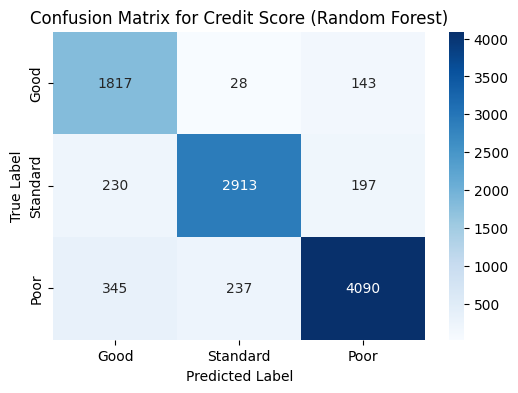

Test Accuracy: 0.724
              precision    recall  f1-score   support

           0       0.59      0.78      0.67       518
           1       0.77      0.77      0.77       822
           2       0.78      0.67      0.72      1160

    accuracy                           0.72      2500
   macro avg       0.71      0.74      0.72      2500
weighted avg       0.74      0.72      0.73      2500



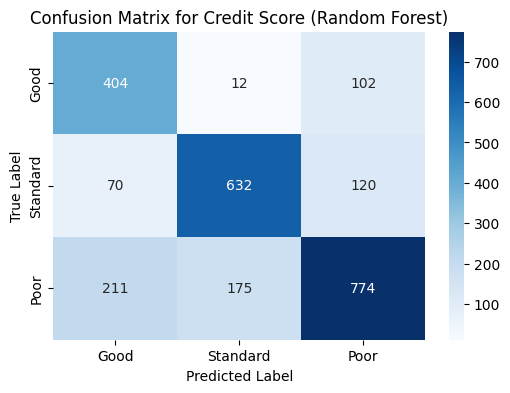

In [38]:
# Train Score
RF_pred_train = rf.predict(X_train)
print("Train Accuracy:", accuracy_score(Y_train, RF_pred_train))
print(classification_report(Y_train, RF_pred_train))
# Confusion Matrix
cm = confusion_matrix(Y_train, RF_pred_train)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Good', 'Standard', 'Poor'], 
            yticklabels=['Good', 'Standard', 'Poor'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Credit Score (Random Forest)')
plt.show()

# Test Score
RF_pred_test = rf.predict(X_test)
print("Test Accuracy:", accuracy_score(Y_test, RF_pred_test))
print(classification_report(Y_test, RF_pred_test))
# Confusion Matrix
cm = confusion_matrix(Y_test, RF_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Good', 'Standard', 'Poor'], 
            yticklabels=['Good', 'Standard', 'Poor'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Credit Score (Random Forest)')
plt.show()

## XGBoost Classifier

Model Training

In [39]:
xgb_model = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('xgb', XGBClassifier(
    n_estimators=400,      
    learning_rate=0.05,   
    max_depth=6,           
    subsample=0.8,         
    colsample_bytree=0.8,
    min_child_weight=5, 
    reg_lambda=10,        
    reg_alpha=2,  
    gamma=0.2,        
    objective="multi:softprob",
    eval_metric="mlogloss",
    random_state=42
    ))
])
# Applying Cross validation
cv_scores = cross_val_score(xgb_model, X_train, Y_train, cv=5, scoring='accuracy')
print(f"Accuracy per fold: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")

# Model Training
xgb_model.fit(X_train,Y_train)

Accuracy per fold: [0.704  0.7185 0.699  0.721  0.7155]
Mean Accuracy: 0.7116
Standard Deviation: 0.0086


,steps,"[('imputer', ...), ('xgb', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,objective,'multi:softprob'


Train Accuracy: 0.8928
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1988
           1       0.92      0.87      0.90      3340
           2       0.89      0.92      0.90      4672

    accuracy                           0.89     10000
   macro avg       0.89      0.88      0.89     10000
weighted avg       0.89      0.89      0.89     10000



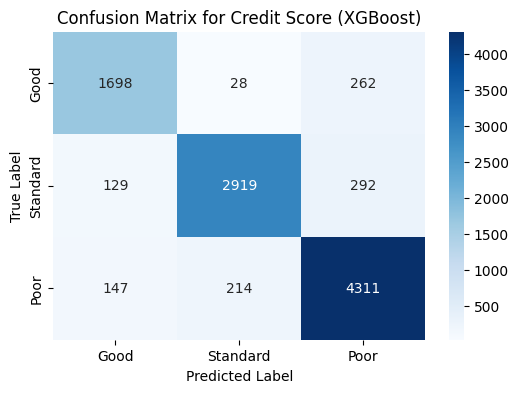

Test Accuracy: 0.7248
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       518
           1       0.79      0.74      0.77       822
           2       0.73      0.74      0.73      1160

    accuracy                           0.72      2500
   macro avg       0.71      0.71      0.71      2500
weighted avg       0.73      0.72      0.73      2500



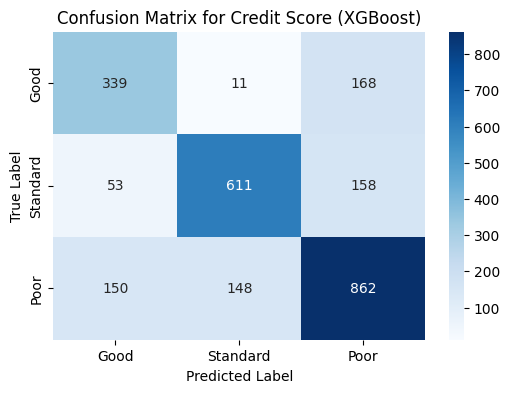

In [40]:
# Train Score  
XG_pred_train = xgb_model.predict(X_train)
print("Train Accuracy:", accuracy_score(Y_train, XG_pred_train))
print(classification_report(Y_train, XG_pred_train))
# Confusion Matrix
cm = confusion_matrix(Y_train, XG_pred_train)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Good', 'Standard', 'Poor'], 
            yticklabels=['Good', 'Standard', 'Poor'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Credit Score (XGBoost)')
plt.show()

# Test Score
XG_pred_test = xgb_model.predict(X_test)
print("Test Accuracy:", accuracy_score(Y_test, XG_pred_test))
print(classification_report(Y_test, XG_pred_test))
# Confusion Matrix
cm = confusion_matrix(Y_test, XG_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Good', 'Standard', 'Poor'], 
            yticklabels=['Good', 'Standard', 'Poor'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Credit Score (XGBoost)')
plt.show()

# Gradient Boosting Classifier

Model Training

In [41]:
gb_model = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingClassifier(
        n_estimators=200,    
        learning_rate=0.05,  
        max_depth=5,           
        subsample=0.8,         
        max_features='sqrt',   
        random_state=42
    ))
])

# 2. Applying Cross validation
cv_scores = cross_val_score(gb_model, X_train, Y_train, cv=5, scoring='accuracy')
print(f"Accuracy per fold: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")

# 3. Final Training
gb_model.fit(X_train, Y_train)

Accuracy per fold: [0.708  0.715  0.6945 0.7205 0.7115]
Mean Accuracy: 0.7099


,steps,"[('imputer', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


Train Accuracy: 0.8238
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1988
           1       0.88      0.81      0.84      3340
           2       0.82      0.86      0.84      4672

    accuracy                           0.82     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.83      0.82      0.82     10000



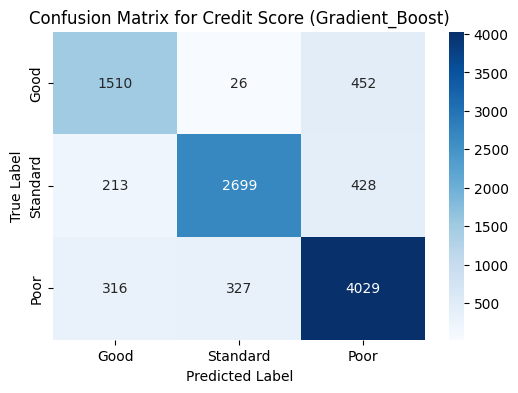

Test Accuracy: 0.7284
              precision    recall  f1-score   support

           0       0.63      0.64      0.64       518
           1       0.80      0.75      0.78       822
           2       0.73      0.75      0.74      1160

    accuracy                           0.73      2500
   macro avg       0.72      0.72      0.72      2500
weighted avg       0.73      0.73      0.73      2500



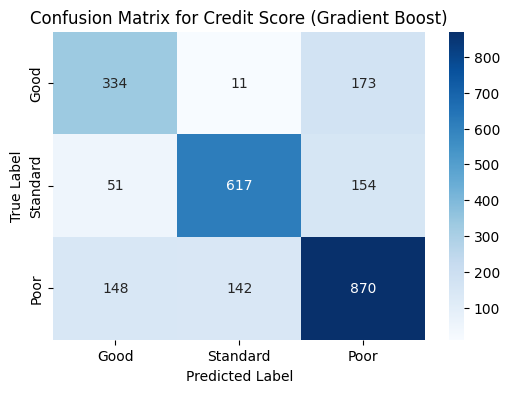

In [42]:
# Train Score
Gb_pred_train = gb_model.predict(X_train)
print("Train Accuracy:", accuracy_score(Y_train, Gb_pred_train))
print(classification_report(Y_train, Gb_pred_train))
# Confusion Matrix
cm = confusion_matrix(Y_train, Gb_pred_train)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Good', 'Standard', 'Poor'], 
            yticklabels=['Good', 'Standard', 'Poor'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Credit Score (Gradient_Boost)')
plt.show()

# Train Score
Gb_pred_test = gb_model.predict(X_test)
print("Test Accuracy:", accuracy_score(Y_test, Gb_pred_test))
print(classification_report(Y_test, Gb_pred_test))
# Confusion Matrix
cm = confusion_matrix(Y_test, Gb_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Good', 'Standard', 'Poor'], 
            yticklabels=['Good', 'Standard', 'Poor'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Credit Score (Gradient Boost)')
plt.show()

# LightGBM


In [43]:

lgb_model = LGBMClassifier(
    n_estimators=2000,
    learning_rate=0.01,
    max_depth=6,
    num_leaves=32,
    min_child_samples=50,
    subsample=0.8,
    colsample_bytree=0.7,
    reg_alpha=1.0,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1
)

# CV
lgb_cv = cross_val_score(lgb_model, X_train, Y_train, cv=8, scoring="accuracy", n_jobs=-1)
print("LightGBM CV Mean:", lgb_cv.mean())
print("LightGBM CV Std:", lgb_cv.std())

# Train
lgb_model.fit(X_train,Y_train)

KeyboardInterrupt: 

Train Accuracy: 0.9082
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1988
           1       0.93      0.89      0.91      3340
           2       0.90      0.93      0.91      4672

    accuracy                           0.91     10000
   macro avg       0.91      0.90      0.91     10000
weighted avg       0.91      0.91      0.91     10000



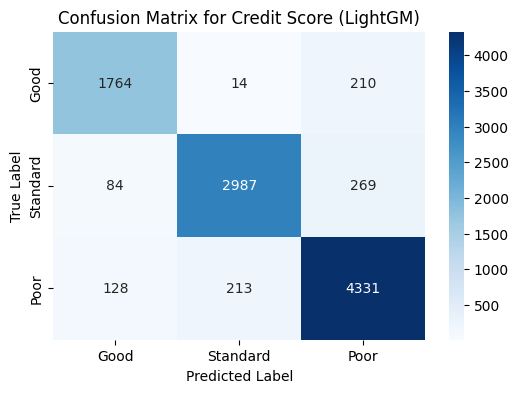

In [ ]:
# Train Score
lgb_pred_train = lgb_model.predict(X_train)
print("Train Accuracy:", accuracy_score(Y_train, lgb_pred_train))
print(classification_report(Y_train, lgb_pred_train))
# Confusion Matrix
cm = confusion_matrix(Y_train, lgb_pred_train)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Good', 'Standard', 'Poor'], 
            yticklabels=['Good', 'Standard', 'Poor'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Credit Score (LightGM)')
plt.show()

# Train Score
lgb_pred_test = gb_model.predict(X_test)
print("Test Accuracy:", accuracy_score(Y_test, lgb_pred_test))
print(classification_report(Y_test, lgb_pred_test))
# Confusion Matrix
cm = confusion_matrix(Y_test, lgb_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Good', 'Standard', 'Poor'], 
            yticklabels=['Good', 'Standard', 'Poor'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Credit Score (Gradient Boost)')
plt.show()

# Final Model Evaluation

Based on the accuracy score of all Models I have trainned here. XGBoost is the best of all.

Training the model with whole 'Train Dataset'.

In [ ]:
# Seperating Train dataset for model training
X = train.drop('Credit_Score', axis=1)
Y = train['Credit_Score']

# Defining Test dataset for model prediction
x = test

# Training model with Train dataset
xgb_model.fit(X,Y)

# Predicting Credit Score for Test dataset
y_pred = xgb_model.predict(x)

# Saving predicted data to CSV
y_pred = pd.DataFrame({
    'Predicted_Credit_Score': y_pred
})
y_pred.to_csv('credit_predictions_test.csv', index=False)

### Making a complete dataset with Pedicted Valuses

Concatinating test with y_pred

In [ ]:

test_with_predictions = pd.concat([test.reset_index(drop=True), y_pred.reset_index(drop=True)], axis=1)

test_with_predictions.to_csv('final_test_results.csv', index=False)

In [44]:
train.columns

Index(['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Num_Credit_Inquiries', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Monthly_Balance',
       'Annual_Income', 'Num_of_Loan', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Payment_of_Min_Amount', 'Credit_Score',
       'Auto Loan', 'Credit-Builder Loan', 'Debt Consolidation Loan',
       'Home Equity Loan', 'Mortgage Loan', 'Not Specified', 'Payday Loan',
       'Personal Loan', 'Student Loan',
       'Pay_Behav_High_spent_Large_value_payments',
       'Pay_Behav_High_spent_Medium_value_payments',
       'Pay_Behav_High_spent_Small_value_payments',
       'Pay_Behav_Low_spent_Large_value_payments',
       'Pay_Behav_Low_spent_Medium_value_payments',
       'Pay_Behav_Low_spent_Small_value_payments', 'Debt_to_Income',
       'Loan_to_Income', 'Interest_Burden', 'Payment_Delay_Ratio'

# Model Saving

In [ ]:
def clean_string_columns(X):
    return pd.DataFrame(X).apply(lambda x: x.astype(str).str.replace('_', '').str.strip())

numeric_features = [
    'Monthly_Inhand_Salary', 'Annual_Income', 'Outstanding_Debt', 
    'Total_EMI_per_month', 'Monthly_Balance', 'Interest_Rate',
    'Num_Credit_Card', 'Num_Bank_Accounts'
]

categorical_features = ['Credit_Mix', 'Payment_of_Min_Amount']

preprocessor = ColumnTransformer(
    transformers=[
        (
            'num',
            Pipeline(steps=[
                ('cleaner', FunctionTransformer(clean_string_columns)),
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', RobustScaler())
            ]),
            numeric_features
        ),
        (
            'cat',
            Pipeline(steps=[
                ('cleaner', FunctionTransformer(clean_string_columns)),
                ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))
            ]),
            categorical_features
        )
    ],
    remainder='drop'
)


optimal_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

# Save it using joblib
joblib.dump(optimal_pipeline, 'optimal_credit_model.joblib')

['optimal_credit_model.joblib']

In [ ]:
# Load the saved pipeline
model = joblib.load('optimal_credit_model.joblib')

# Try predicting on a few rows of raw data
# Note: The data must be RAW (with underscores and missing values) 
# because your pipeline is now built to handle them!
new_data = pd.read_csv('test.csv').head(5) 
predictions = model.predict(new_data)

print(predictions)

NotFittedError: Pipeline is not fitted yet.